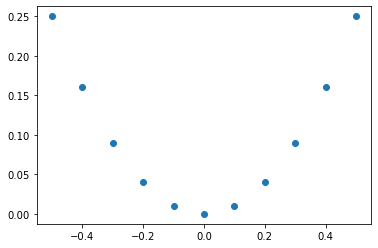

In [32]:
import matplotlib.pyplot as plt

# using function in the form y = f(x)
# y = x^2
def calculate(x):
    return x**2

inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
outputs = [calculate(x_val) for x_val in inputs]

plt.scatter(x=inputs, y=outputs)
# plt.plot(inputs, outputs)
plt.show()

In [33]:
import numpy as np

def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = np.random.rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = np.hstack((X1, X2))
	# generate class labels
	y = np.ones((n, 1))
	return X, y

def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_vector_space(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = np.zeros((n, 1))
	return X, y

In [31]:
!pip install keras
!pip install pydot

^C


In [34]:
# Discriminator Model
# model has to take a sample from the generative model and output a classification (if sample is real or fake)
import tensorflow as tf

# neural network structure
#   input  layer (2 nodes)
# 1 hidden layer (25 nodes) - ReLu activation function - He weight initialization
#   output layer (1 node)   - Sigmoid activation function

def discriminator_model(num_inputs=2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=25, activation = 'relu', kernel_initializer='he_uniform', input_dim=num_inputs))
    model.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

model = discriminator_model()
model.summary()
# keras.utils.plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 25)                75        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [35]:
# training discriminator
def train_discriminator_model(model, num_epochs=1000, batch_size=128):
    half_batch = batch_size // 2
    for i in range(num_epochs):
        # generate and train on real batch and update model
        x_real, y_real = generate_real_samples(num_samples=half_batch)
        x_real = np.array(x_real)
        y_real = np.array(y_real)
        model.train_on_batch(x_real, y_real)

        # generate and train on fake batch and update model
        x_fake, y_fake = generate_fake_samples(num_samples=half_batch)
        x_fake = np.array(x_fake)
        y_fake = np.array(y_fake)
        model.train_on_batch(x_fake, y_fake)

        # evaluate model
        _, accuracy_real = model.evaluate(x_real, y_real, verbose = 0)
        _, accuracy_fake = model.evaluate(x_fake, y_fake, verbose = 0)

        print('[iteration {}   real_data_accuracy {}   fake_data_accuracy {}]'.format(i + 1, accuracy_real, accuracy_fake))

In [ ]:
model = discriminator_model()
train_discriminator_model(model)

[iteration 1   real_data_accuracy 0.0   fake_data_accuracy 1.0]
[iteration 2   real_data_accuracy 0.015625   fake_data_accuracy 1.0]
[iteration 3   real_data_accuracy 0.015625   fake_data_accuracy 0.984375]
[iteration 4   real_data_accuracy 0.03125   fake_data_accuracy 0.984375]
[iteration 5   real_data_accuracy 0.015625   fake_data_accuracy 0.984375]
[iteration 6   real_data_accuracy 0.015625   fake_data_accuracy 0.984375]
[iteration 7   real_data_accuracy 0.03125   fake_data_accuracy 1.0]
[iteration 8   real_data_accuracy 0.046875   fake_data_accuracy 0.96875]
[iteration 9   real_data_accuracy 0.0625   fake_data_accuracy 0.984375]
[iteration 10   real_data_accuracy 0.03125   fake_data_accuracy 1.0]
[iteration 11   real_data_accuracy 0.078125   fake_data_accuracy 0.921875]
[iteration 12   real_data_accuracy 0.03125   fake_data_accuracy 0.953125]
[iteration 13   real_data_accuracy 0.09375   fake_data_accuracy 0.953125]
[iteration 14   real_data_accuracy 0.046875   fake_data_accuracy 0.

In [36]:
def generator_model(latent_dim, num_outputs=2):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(tf.keras.layers.Dense(num_outputs, activation='linear'))

    return model

In [37]:
latent_space_vector_dims = 5
model = generator_model(latent_space_vector_dims)

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [49]:
# GENERATE LATENT VECTOR SPACE
def generate_latent_vector_space(latent_space_dimensions, num_vectors):
    x_vectors = np.random.randn(latent_space_dimensions * num_vectors)

    x_vectors = x_vectors.reshape(num_vectors, latent_space_dimensions)
    return x_vectors

In [39]:
latent_space_dimensions = 5
model = generator_model(latent_space_dimensions)
generate_fake_samples(model, latent_space_dimensions, 100)

(array([[-2.58680582e+00,  1.87821805e-01],
        [-6.37670606e-02,  1.02828729e+00],
        [ 1.50035188e-01,  3.07921457e+00],
        [-6.20569587e-01,  3.03750849e+00],
        [ 7.70661905e-02,  4.30071950e-01],
        [-3.68532538e-02,  2.04243660e+00],
        [-3.35571527e+00, -4.39476550e-01],
        [-6.32145822e-01,  2.46242142e+00],
        [ 6.34286761e-01,  9.33767796e-01],
        [ 3.81510735e-01,  1.48458314e+00],
        [ 1.92625415e+00,  6.01723909e-01],
        [-8.83253455e-01,  6.48279667e-01],
        [-7.94089913e-01, -5.17345309e-01],
        [-1.56798863e+00,  7.49428093e-01],
        [ 2.91370690e-01,  8.49907398e-02],
        [-1.92368537e-01,  1.02605462e+00],
        [-1.79635197e-01,  2.34959602e+00],
        [-1.22728840e-01,  3.84410143e-01],
        [-1.38050091e+00,  1.44789445e+00],
        [ 1.19544841e-01,  1.20529962e+00],
        [ 4.13780063e-01,  9.77045059e-01],
        [ 1.44336307e+00,  1.19877803e+00],
        [-1.65414646e-01,  6.420

In [ ]:
def GAN(generator_model, discriminator_model):
    discriminator_model.trainable = False

    model = tf.keras.Sequential()

    model.add(generator_model)
    model.add(discriminator_model)

    model.compile(loss='binary_crossentropy', optimizer='adam')

    return model

latent_space_dimensions = 5

discriminator_network = discriminator_model()
generator_network = generator_model(latent_space_dimensions)

gan_network = GAN(generator_network, discriminator_network)
gan_network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


In [40]:
def train_GAN(gan_model, latent_space_dimensions, num_epochs=10000, batch_size=128):
    for i in range(num_epochs):
        x_latent_vectors = generate_latent_vector_space(latent_space_dimensions, batch_size)
        y_labels = [[1] for i in range(batch_size)]

        gan_model.train_on_batch(x_latent_vectors, y_labels)

In [89]:
def train(generator_model, discriminator_model, gan_model, latent_space_dimensions, num_epochs=10000, batch_size=128, evaluation_buffer=1000):
    half_batch = batch_size // 2

    for i in range(num_epochs):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_samples(generator_model, latent_space_dimensions, half_batch)

        discriminator_model.train_on_batch(x_real, y_real)
        discriminator_model.train_on_batch(x_fake, y_fake)

        x_latent_space = generate_latent_vector_space(latent_space_dimensions, batch_size)
        y_labels = np.array([[1] for i in range(batch_size)])

        gan_model.train_on_batch(x_latent_space, y_labels)

        if (i + 1) % evaluation_buffer == 0 or i == 0:
            evaluate_generator(generator_model, latent_space_dimensions, discriminator_model, i)
        if (i + 1) == 10000:
            generator_model.save('./models/generator_model')
            discriminator_model.save('./models/discriminator_model')
            gan_model.save('./models/GAN_model')

In [84]:
def evaluate_generator(generator, latent_space_dimensions, discriminator, epoch_number, num_samples=100):
    x_real, y_real = generate_real_samples(num_samples)
    _, accuracy_real_data = discriminator.evaluate(x_real, y_real, verbose=0)
    x_fake, y_fake = generate_fake_samples(generator, latent_space_dimensions, num_samples)
    _, accuracy_fake_data = discriminator.evaluate(x_fake, y_fake, verbose=0)

    print('[ EPOCH {} REAL_DATA {} FAKE_DATA {} ]'.format(epoch_number, accuracy_real_data, accuracy_fake_data))

    plt.scatter(x_real[:, 0], x_real[:, 1], color='blue')
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='limegreen')
    plt.show()

[ EPOCH 0 REAL_DATA 0.9700000286102295 FAKE_DATA 0.7599999904632568 ]


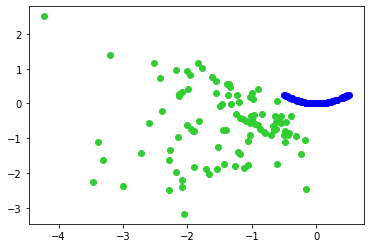

INFO:tensorflow:Assets written to: ./models/generator_model\assets
INFO:tensorflow:Assets written to: ./models/discriminator_model\assets
INFO:tensorflow:Assets written to: ./models/GAN_model\assets


KeyboardInterrupt: 

In [88]:
latent_space_vector_dimensions = 5
discriminator = discriminator_model()
generator = generator_model(latent_space_vector_dimensions)

gan_model = GAN(generator, discriminator)

train(generator, discriminator, gan_model, latent_space_vector_dimensions)

In [44]:
np.random.randn(5 * 100)

array([ 3.40159248e-01, -6.16938306e-01, -4.03441922e-01, -1.74869279e-01,
        4.10800167e-01, -7.32680351e-01, -1.47996898e+00,  1.24984419e+00,
       -1.10437880e+00, -3.02977598e-01, -7.79956083e-01, -2.41976779e-01,
        7.89878495e-02,  7.76984872e-01, -3.73182445e-02,  5.88063717e-01,
        7.07002505e-02,  2.48155687e-01, -4.25282053e-01,  6.03837019e-01,
        2.78291286e-01,  2.04640450e-01,  2.90299915e-01, -9.80805447e-01,
       -3.27475220e-01, -6.97239025e-01,  1.61001954e+00,  1.98680412e-01,
        5.99418926e-01, -1.13265967e+00, -4.69237045e-01, -2.92849120e-01,
        1.32862871e+00,  6.53715667e-01, -1.09666418e-01, -6.90414814e-01,
        1.09332166e+00,  5.78995668e-01,  1.06928083e+00, -1.32659847e+00,
       -3.25009788e-02, -1.65948401e+00,  4.21665556e-01,  1.01459791e+00,
        6.84276434e-01,  1.49929687e-01, -8.83579650e-01,  4.90340643e-01,
       -2.19242845e+00, -5.42180880e-01, -1.82285299e+00,  7.37101676e-05,
        8.28181914e-01, -